# Цель лабораторной работы

Изучить различные методы визуализации данных

# Задание

Требуется выполнить следующие действия:
- Выбрать набор данных (датасет).
- Создать ноутбук, который содержит следующие разделы:
    1. Текстовое описание выбранного набора данных.
    2. Основные характеристики датасета.
    3. Визуальное исследование датасета.
    4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на GitHub.

# Ход выполнения работы

## Текстовое описание набора данных

#### В качестве набора данных используем датасет из открытой коллекции ресурса kaggle.com  
    https://www.kaggle.com/mohansacharya/graduate-admissions
    
    Набор данных был собран для абитуриентов из Индии

#### Датасет содержит следующие параметры:
 - GRE Scores - Graduate Record Examinations -  тест, который необходимо сдавать для поступления в аспирантуру, магистратуру или иной последипломный курс в вузе США и ряда других стран (значения от 0 до 340)
 - TOEFL Scores - Test of English as a Foreign Language - стандартизованный тест на знание английского языка для неанглоязычных студентов (0 - 120)
 - University Rating - рейтинг университета, в котором обучался абитуриент (0 - 5, целые)
 - Statement of Purpose and Letter of Recommendation Strength - резюме и рекомендательные письма (0 - 5)
 - Undergraduate GPA - Grade Point Average - Средний балл в университете (0 - 10)
 - Research Experience - Опыт публикаций (0 или 1)
 - Chance of Admit - вероятность зачисления - целевой признак - (от 0 до 1)
 
 Тренировочные данные собраны в файле data.csv

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# Загрузим тренировочную выборку используя средства библиотеки pandas
data = pd.read_csv('data.csv', sep=",")

##  Характеристики датасета

In [4]:
# Первые 5 строк датасета
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.50000,4.50000,9.65000,1,0.92000
1,2,324,107,4,4.00000,4.50000,8.87000,1,0.76000
2,3,316,104,3,3.00000,3.50000,8.00000,1,0.72000
3,4,322,110,3,3.50000,2.50000,8.67000,1,0.80000
4,5,314,103,2,2.00000,3.00000,8.21000,0,0.65000


In [5]:
rows_count = data.shape[0]
cols_count = data.shape[1]
print('Всего строк: {}'.format(rows_count))
print('Всего столбцов: {}'.format(cols_count))

Всего строк: 500
Всего столбцов: 9


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000
mean,250.50000,316.47200,107.19200,3.11400,3.37400,3.48400,8.57644,0.56000,0.72174
std,144.48183,11.29515,6.08187,1.14351,0.99100,0.92545,0.60481,0.49688,0.14114
min,1.00000,290.00000,92.00000,1.00000,1.00000,1.00000,6.80000,0.00000,0.34000
25%,125.75000,308.00000,103.00000,2.00000,2.50000,3.00000,8.12750,0.00000,0.63000
50%,250.50000,317.00000,107.00000,3.00000,3.50000,3.50000,8.56000,1.00000,0.72000
75%,375.25000,325.00000,112.00000,4.00000,4.00000,4.00000,9.04000,1.00000,0.82000
max,500.00000,340.00000,120.00000,5.00000,5.00000,5.00000,9.92000,1.00000,0.97000


In [32]:
data['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

##  Визуальное исследование датасета

#### Диаграмма рассеивания для признаков GRE Score и TOEFL Score, а также относительно влияния целевого признака

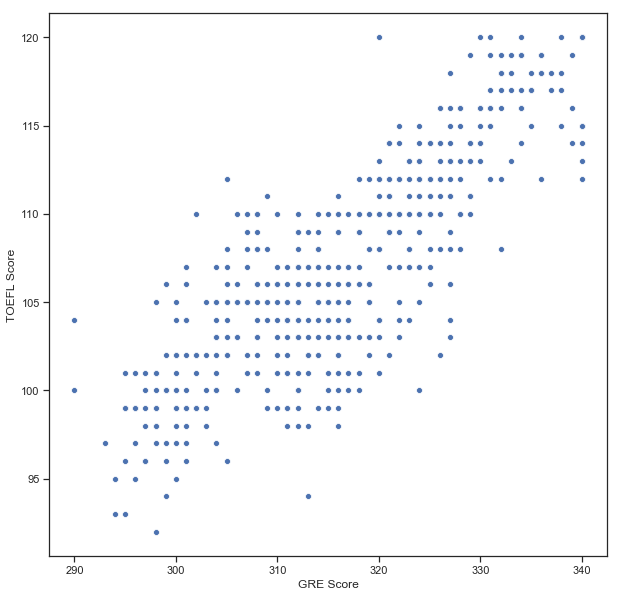

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score', data=data)

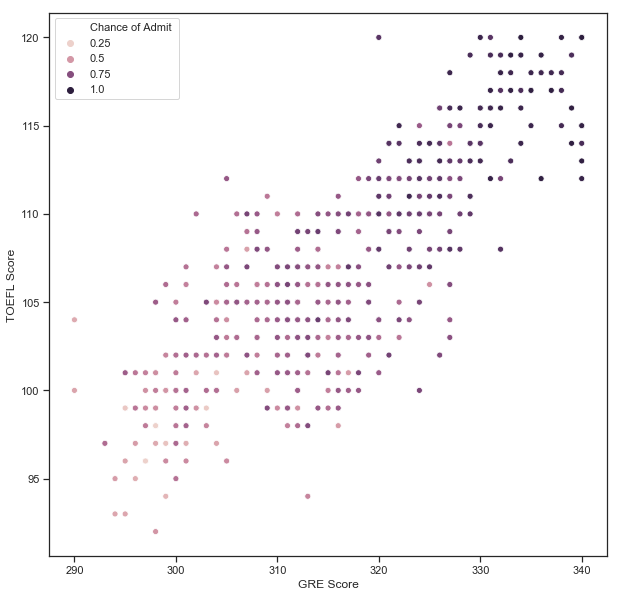

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score', data=data, hue='Chance of Admit ')

#### Гистограмма для оценки плотности вероятности распределения данных

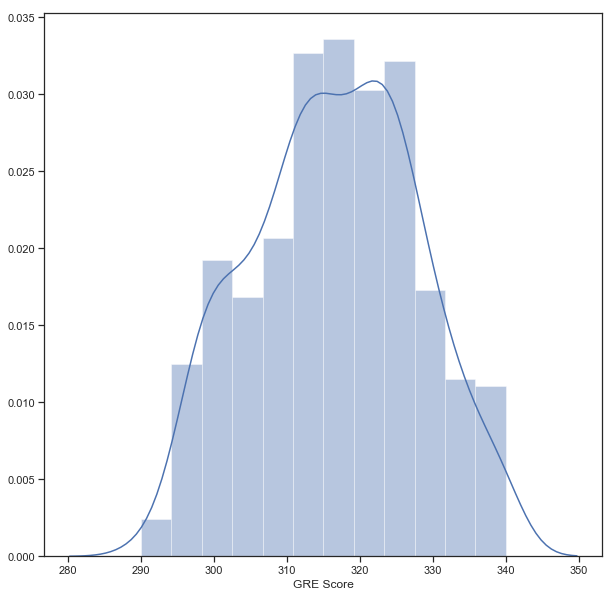

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['GRE Score'])

#### Комбинация диаграмм рассеивания и гистограмм позволяет визуально оценить распределение данных для двух признаков

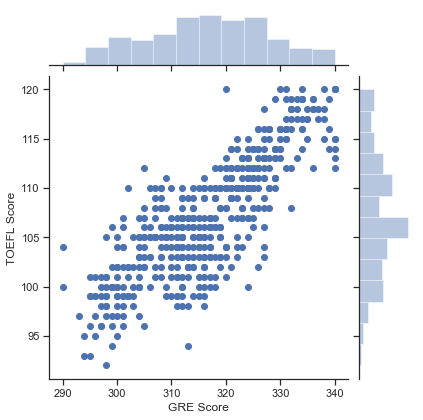

In [36]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data)

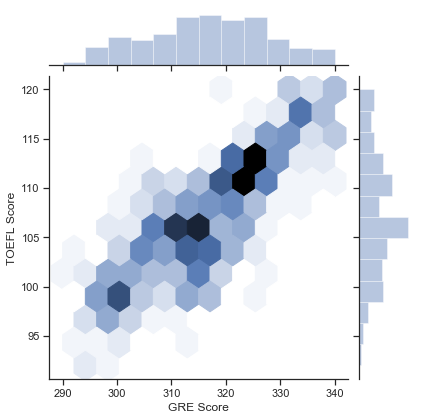

In [37]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind="hex")

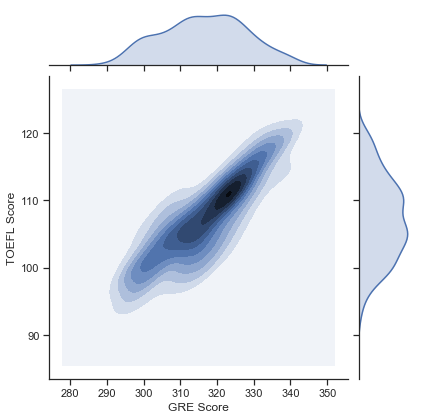

In [38]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind="kde")

### Парные диаграммы

Комбинации диаграмм рассеивания и гистограмм для всех признаков

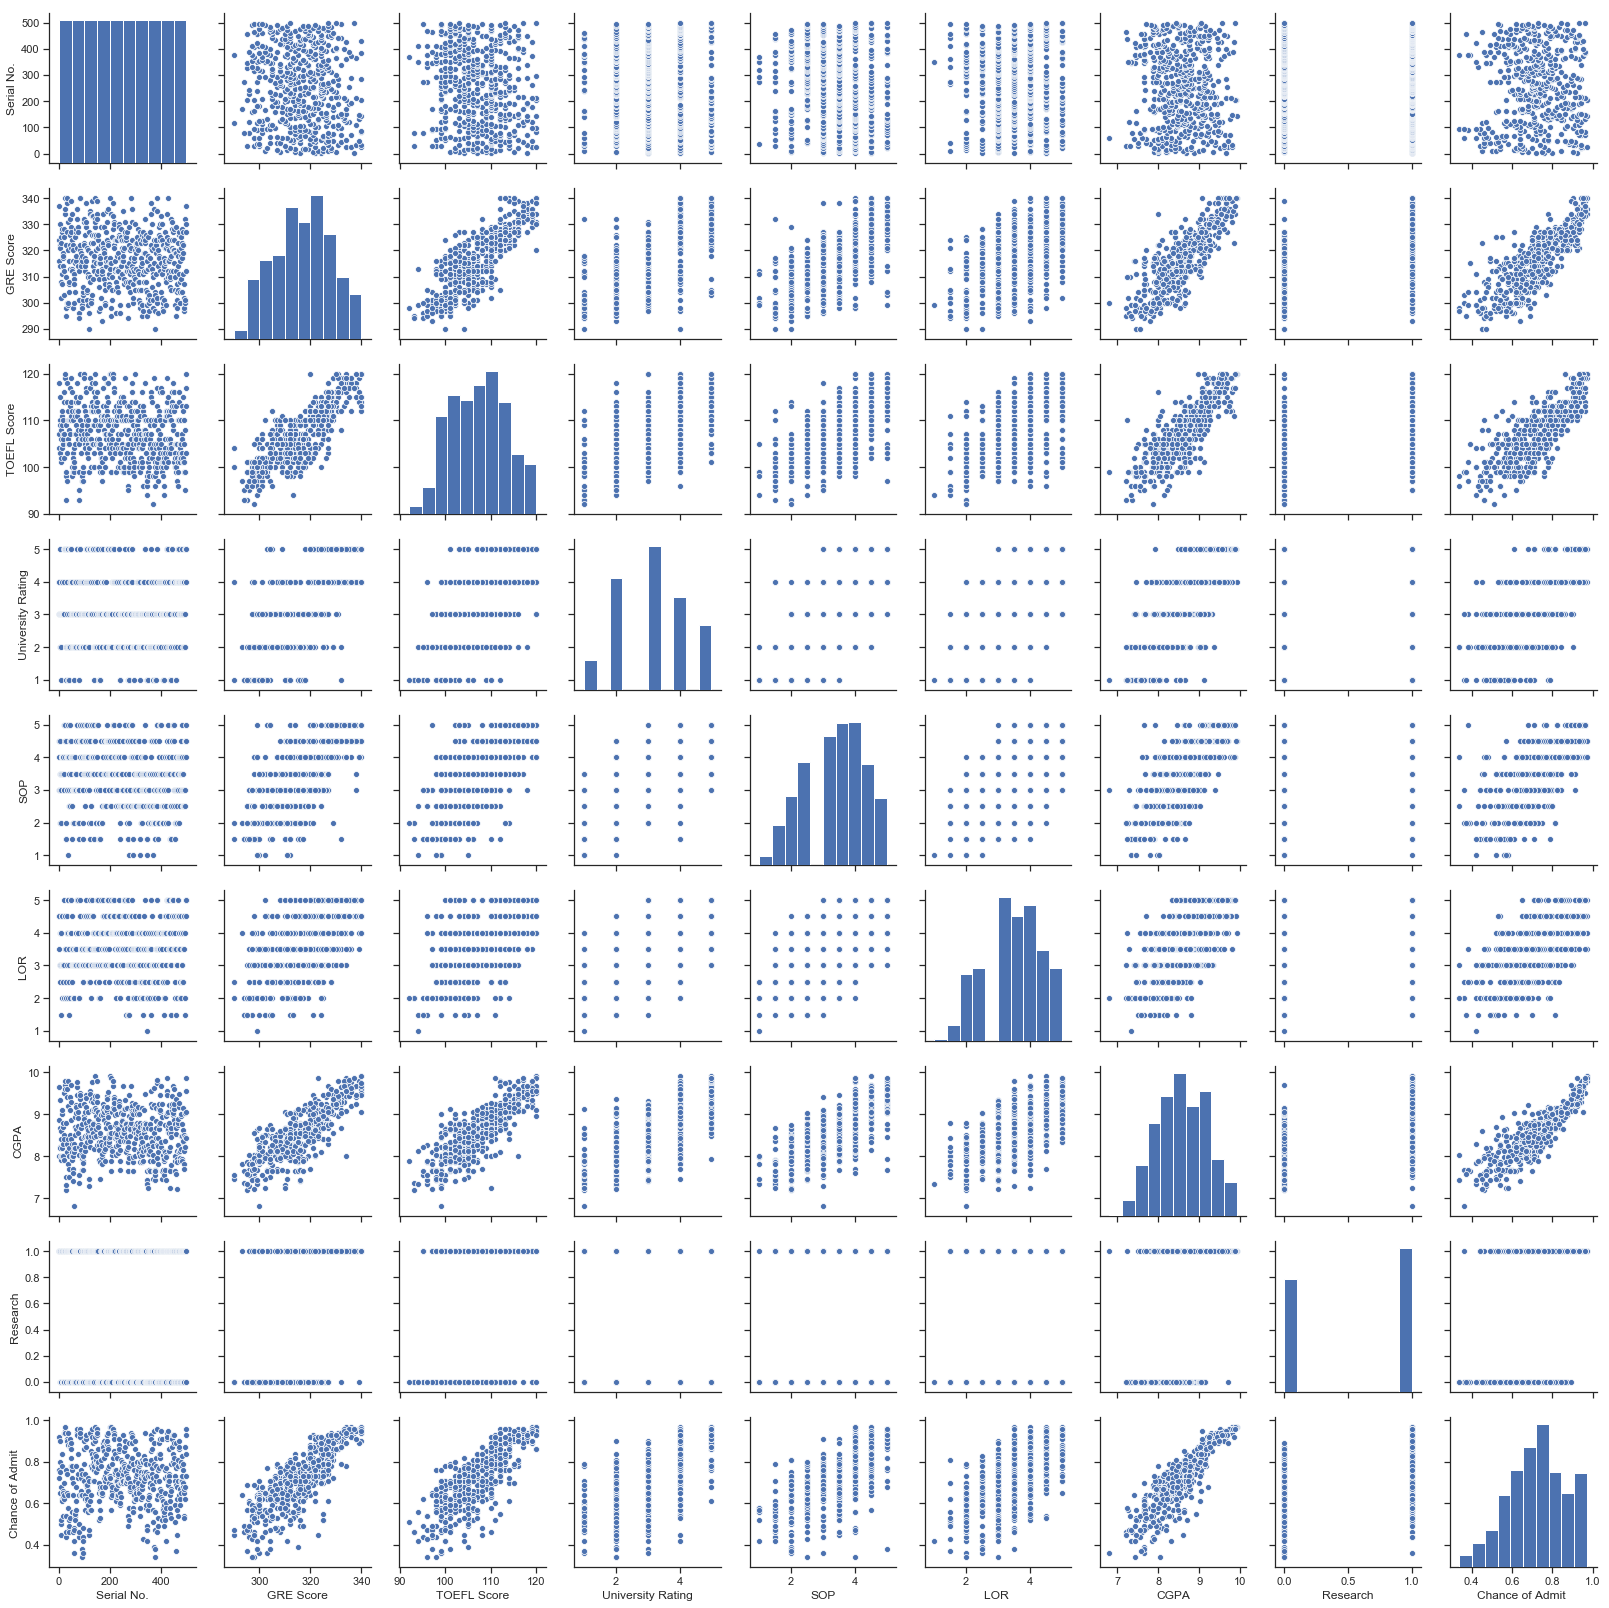

In [39]:
sns.pairplot(data)

## Корреляция признаков

Позволяет оценить корреляцию признаков с целевым, а также выявить линейные зависимости.

In [40]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00000,-0.10384,-0.14170,-0.06764,-0.13735,-0.00369,-0.07429,-0.00533,0.00851
GRE Score,-0.10384,1.00000,0.82720,0.63538,0.61350,0.52468,0.82588,0.56340,0.81035
TOEFL Score,-0.14170,0.82720,1.00000,0.64980,0.64441,0.54156,0.81057,0.46701,0.79223
University Rating,-0.06764,0.63538,0.64980,1.00000,0.72802,0.60865,0.70525,0.42705,0.69013
SOP,-0.13735,0.61350,0.64441,0.72802,1.00000,0.66371,0.71215,0.40812,0.68414
LOR,-0.00369,0.52468,0.54156,0.60865,0.66371,1.00000,0.63747,0.37253,0.64536
CGPA,-0.07429,0.82588,0.81057,0.70525,0.71215,0.63747,1.00000,0.50131,0.88241
Research,-0.00533,0.56340,0.46701,0.42705,0.40812,0.37253,0.50131,1.00000,0.54587
Chance of Admit,0.00851,0.81035,0.79223,0.69013,0.68414,0.64536,0.88241,0.54587,1.00000


In [41]:
data.corr(method='kendall')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00000,-0.06850,-0.09866,-0.04053,-0.10158,0.00234,-0.05347,-0.00436,-0.00599
GRE Score,-0.06850,1.00000,0.65592,0.51484,0.47597,0.38616,0.65131,0.47838,0.64717
TOEFL Score,-0.09866,0.65592,1.00000,0.52035,0.50457,0.40351,0.63541,0.39652,0.62248
University Rating,-0.04053,0.51484,0.52035,1.00000,0.62457,0.49740,0.56575,0.39437,0.57084
SOP,-0.10158,0.47597,0.50457,0.62457,1.00000,0.53564,0.55825,0.35595,0.55272
LOR,0.00234,0.38616,0.40351,0.49740,0.53564,1.00000,0.48547,0.32887,0.49428
CGPA,-0.05347,0.65131,0.63541,0.56575,0.55825,0.48547,1.00000,0.41742,0.73183
Research,-0.00436,0.47838,0.39652,0.39437,0.35595,0.32887,0.41742,1.00000,0.46700
Chance of Admit,-0.00599,0.64717,0.62248,0.57084,0.55272,0.49428,0.73183,0.46700,1.00000


In [42]:
data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00000,-0.09959,-0.14261,-0.05542,-0.14425,0.00422,-0.07513,-0.00533,-0.00173
GRE Score,-0.09959,1.00000,0.82385,0.64342,0.62069,0.51435,0.82925,0.57849,0.82220
TOEFL Score,-0.14261,0.82385,1.00000,0.64553,0.64471,0.52343,0.80948,0.47454,0.79363
University Rating,-0.05542,0.64342,0.64553,1.00000,0.72940,0.60232,0.70333,0.43535,0.70374
SOP,-0.14425,0.62069,0.64471,0.72940,1.00000,0.66265,0.71738,0.40909,0.70280
LOR,0.00422,0.51435,0.52343,0.60232,0.66265,1.00000,0.63956,0.37617,0.64363
CGPA,-0.07513,0.82925,0.80948,0.70333,0.71738,0.63956,1.00000,0.50926,0.88879
Research,-0.00533,0.57849,0.47454,0.43535,0.40909,0.37617,0.50926,1.00000,0.56572
Chance of Admit,-0.00173,0.82220,0.79363,0.70374,0.70280,0.64363,0.88879,0.56572,1.00000


#### Тепловые карты для визуального отображения корреляции признаков

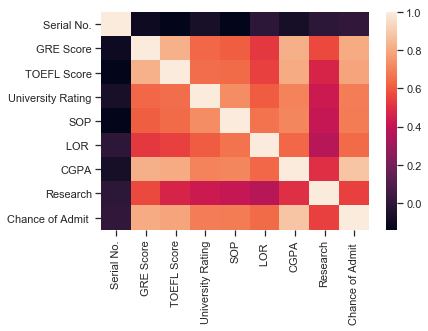

In [43]:
sns.heatmap(data.corr())

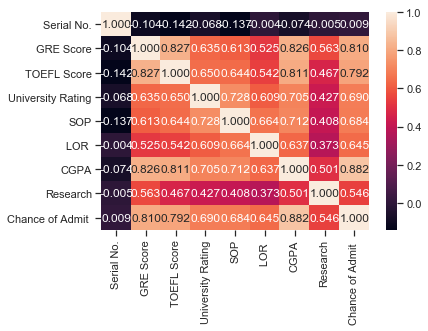

In [44]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

### Выводы из матриц корреляции

1) Вероятность зачисления слабее всего коррелирует с показателем Research (0,56) - хотя корреляция не слишком слабая, этот признак можно вывести из модели
2) У трех признаков GRE Score, TOEFL Score, CGPA - сильная корреляция между собой, однако эти признаки также сильно коррелируют и с целевым - значит следует оставить их в модели